# HW1 Notebook
#### This assignment will introduce you with the Intel DevCloud and with OpenMP basic directives and concepts of parallel computing as part of the OpenMP Common Core. 

#### Use this notebook to compile your files, submit your jobs to Intel DevCloud nodes and observe/analyze your results.
## Submittion instructions
- #### Publication Date: 10/11.
- #### Submission Date: 4/12.
- #### Submittion in groups of up to 2 students (individually or in pairs). 
- #### Submittion on the course website, in zip format including this directory with the relevant output, specifically: 
  - the source files.
  - this notebook (run_hw1.ipynb) after executing all the cells. 
  - output files of queued jobs that might be created during the execution. 

### Fill the name and ID of the submitters:
#### Student Name: Yosef Goren Stdudent ID: 211515606

**Note:** If you submit in pairs, it is sufficient that only single student submit the assaignment on the course website. \
Remove one line if submitted individually, or keep it empty.

## the Portable Batch System (PBS) on Intel DevCloud

Portable Batch System (PBS) is the scheduler that is used on Intel DevCloud to submit jobs on the cluster. \
The next material may help you manage your work on the cloud:
- **Quick tutorial for PBS:** https://albertsk.files.wordpress.com/2011/12/pbs.pdf.
- **Intel DevCloud Job Submission:** https://devcloud.intel.com/oneapi/documentation/job-submission.
- **Intel DevCloud Queue Management:** https://devcloud.intel.com/oneapi/documentation/advanced-queue.

## Problem 1: Know Your Hardware (10 points)
### In this section we will get familiar with Intel DevCloud nodes, and learn how to simply submit a job via the PBS scheduler. 
- The _pbsnodes_ command is used to find out the architectures and features of the compute nodes available to you. The actual output of pbsnodes may be very long if your share of the Intel® DevCloud includes a lot of compute nodes, so you may need to pipe the output. Specifically, it might be interesting to get the list of all the different properties and the number of nodes associated with the property by running the following command:

In [1]:
! pbsnodes | grep "properties =" | awk '{print $3}' | sort | uniq -c

     25 core,tgl,i9-11900kb,ram32gb,netgbe,gpu,gen11
     78 xeon,cfl,e-2176g,ram64gb,net1gbe,gpu,gen9
      4 xeon,clx,ram192gb,net1gbe,batch,extended,fpga,stratix10,fpga_runtime
      6 xeon,icx,gold6348,ramgb,netgbe,jupyter,batch
     28 xeon,icx,plat8358,ram256gb,net1gbe,batch
      8 xeon,icx,plat8380,ram2tb,net1gbe,batch
     12 xeon,skl,gold6128,ram192gb,net1gbe,fpga_runtime,fpga,arria10
     86 xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch
     35 xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch,fpga_compile
     12 xeon,skl,ram384gb,net1gbe,renderkit


- The next script is used to print basic hardware specifications of a compute node. Run the next cell to print the content of the script.

In [2]:
#print content of check_specifications.sh
%pycat check_specifications.sh

#!/bin/bash
/bin/echo "##" $(whoami) is checking specifications of a standard CPU Intel DevCloud node
echo "########################################### lscpu:"
lscpu
echo "########################################### cat /proc/cpuinfo:"
cat /proc/cpuinfo
echo "########################################### cat /proc/meminfo:"
cat /proc/meminfo
echo "########################################### numactl --hardware"
numactl --hardware
exit


- We now submit the script to the Intel Dev Cloud using the _qsub_ command of PBS. 
When not providing any other parameters, this command allocates the first available node on the cluster for this job. For the next sections of this assignment, we only work with CPU threads (we do not need any further properties like GPU), so for now any node will be fine. Run the following cell. The output will be created in the current directory. Watch it.

In [3]:
#Alloc a CPU compute node and see its specifications
! chmod 755 check_specifications.sh;
! qsub check_specifications.sh

2038972.v-qsvr-1.aidevcloud


##### Explain what do you learn from the specs. Focus on:
- How many CPU sockets there are in the node?
- How many physical cores for each CPU socket?
- How many Non-Uniform Memory Access (NUMA) nodes in the system? What does it mean? 
- What does it mean "Thread(s) per core"? (Hint: check in google for "_Hyper-Threading_").
- What are the cache sizes in the system? 

### Note: The _q_ script
The script file _q_ is used to submit jobs easily via PSB on Intel DevCloud. We will use it from now on. \
When _q_ is used to submit jobs within a Jupityer notebook, then if allocation of resources is enabled within 60 seconds, output will be printed on the notebook itself; otherwise the job will be queded for execution, and the associated output file will be created later in the current directory. \
**Therefore, pay attention that all jobs are completed on notebook or successfully create associated output files before you submit your work.**

## Problem 2: Warming-up (10 points)
### What are the difference (if any) between the three code snippets? 

## Problem 3: Mandelbrot area (40 points)
The mandelbrot set is the set of complex numbers _c_ for which the function _z^2+c_ does not diverge when iterated from z=0. 
The area of the Mandelbrot set is known to be around 1.506.
The serial program in _mandel_serial.c_ loops over a grid of points (5000x5000 points) in the complex plane which contains the Mandelbrot set, and tests each point to see whether it is inside or outside the set.
#### In this exercise you will implement various parallel versions of the Mandelbrot program with OpenMP on a CPU node.
#### Edit the following files to implement parallelization with CPU threads for the given serial code using OpenMP according to the following requirements:
- **_mandel_parallel_critical.c_** - implementation using critical sections for synchronization of a single variable.
- **_mandel_parallel_atomic.c_** - implementation using atomic operations for synchronization of a single variable.
- **_mandel_parallel_false_sharing.c_** - implementation with global array of variables, each thread updates its own variable, creating false sharing (then a single thread reduce the results). 
- **_mandel_parallel_padding.c_** - as before, implementation with global array of variables, now using padding to prevent false sharing. 
- **_mandel_parallel_reduction.c_** - implementation with the reduction clause on a parallel loop construct.

##### Hint: In class we saw similar implementations for the Monte Carlo Pi Calculation.
##### You are required to test the parallel implementations with a varying number of compute threads. Note that we already made within the files the infrastructure to loop over varying number of threads (to make it easy to you).
##### Pay attention you keep the timers wrapping the main loop of calculation in your parallel implementations.

#### Then run the following cells, and collect the results.
Note that the _.sh._ files include the compilation of the source file for each implementation. In this assaignment we use the _icx_ compiler.  

In [1]:
cd problem3

/home/u176694/High-Performance-Computing-236606/Homework_1/problem3


### pi_serial.c

In [2]:
%pycat mandel_serial.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>

# define NPOINTS 5000
# define MAXITER 5000

void testpoint(void);

struct d_complex {
   double r;
   double i;
};

struct d_complex c;
int numoutside = 0;

int main() {
    
   int i, j;
   double area, error, eps = 1.0e-5;
   double start_time, run_time;
   start_time = omp_get_wtime();
    
   // Loop over grid of points in the complex plane which contains 
   // the Mandelbrot set, test each point to see whether it is 
   // inside or ou

In [ ]:
! chmod 755 ../q; chmod 755 mandel_serial.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_serial.sh; else ./run_serial.sh; fi

### pi_parallel_critical.c

In [ ]:
%pycat mandel_parallel_critical.c

In [ ]:
! chmod 755 run_parallel_critical.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_critical.sh; else ./run_parallel_critical.sh; fi

### pi_parallel_atomic.c

In [ ]:
%pycat mandel_parallel_atomic.c

In [ ]:
! chmod 755 run_parallel_atomic.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_atomic.sh; else ./run_parallel_atomic.sh; fi

### pi_parallel_false_sharing.c

In [ ]:
%pycat mandel_parallel_false_sharing.c

In [ ]:
! chmod 755 run_parallel_false_sharing.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_false_sharing.sh; else ./run_parallel_false_sharing.sh; fi

### pi_parallel_padding.c

In [ ]:
%pycat mandel_parallel_padding.c

In [ ]:
! chmod 755 run_parallel_padding.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_padding.sh; else ./run_parallel_padding.sh; fi

### pi_parallel_reduction.c

In [ ]:
%pycat mandel_parallel_reduction.c

In [ ]:
! chmod 755 run_parallel_reduction.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_reduction.sh; else ./run_parallel_reduction.sh; fi

### Summering the results
#### Fill the following table with the execution times (in seconds) according to the number of threads:

|  Number of Threads  |      serial       |      critical       |      atomic         |     false sharing   |      padding        |      reduction     |
|:-------------------:|:-----------------:|:-------------------:|:-------------------:|:-------------------:|:-------------------:|:------------------:|
| 1                   |    123.196259     |        0.152473         |        9.032136         |        8.905875         |        9.020579         |        8.986111        |
| 2                   |       --          |        0.125662         |        7.693729         |        4.477742         |        4.518221         |        7.642874        |
| 4                   |       --          |        0.082194         |        4.122802         |        2.260810         |        2.267503         |        4.086676        |
| 8                   |       --          |        0.089109         |        2.549137         |        1.149872         |        1.156635         |        2.515460        |
| 16                  |       --          |        0.086509         |        1.410493         |        0.628068         |        0.625293         |        1.418774        |
| 24                  |       --          |        0.402451         |        1.022161         |        0.441075         |        0.423927         |        1.078743        |


### Fill the results in the following pyplot figure to create a stong scale graph:
Note that the values on the graph should be the speedup achieved (relative to a serial computation).

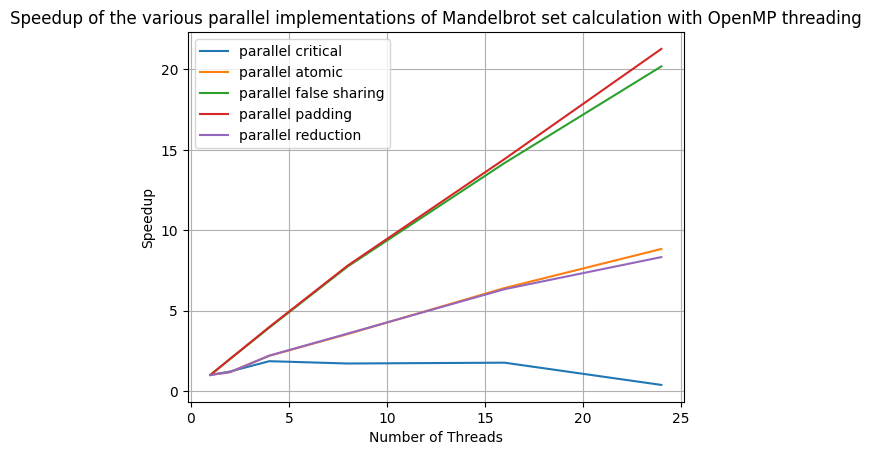

In [2]:
import matplotlib.pyplot as plt
threads = [1,2,4,8,16,24]
speedup_critical = [1, 1.2133580557368178, 1.8550380806384894, 1.7110841778047112, 1.7625102590481914, 0.3788610290445296]
speedup_atomic = [1, 1.1739607672690315, 2.190776078987058, 3.543213252171225, 6.403531247585064, 8.83631443578849]
speedup_false_sharing = [1, 1.988920978475312, 3.9392408030750037, 7.745101193872014, 14.179794226102906, 20.191293997619454]
speedup_padding = [1, 1.9964891048932756, 3.978199367321675, 7.79898498662067, 14.426163414591239, 21.278614006656806]
speedup_reduction = [1, 1.1757502478779578, 2.1988802146291997, 3.5723529692382305, 6.333715588247317, 8.330168538752973]

plt.plot(threads, speedup_critical, label = "parallel critical")
plt.plot(threads, speedup_atomic, label = "parallel atomic")
plt.plot(threads, speedup_false_sharing, label = "parallel false sharing")
plt.plot(threads, speedup_padding, label = "parallel padding")
plt.plot(threads, speedup_reduction, label = "parallel reduction")
  
# naming the x axis
plt.xlabel('Number of Threads')
# naming the y axis
plt.ylabel('Speedup')
# giving a title to my graph
plt.title('Speedup of the various parallel implementations of Mandelbrot set calculation with OpenMP threading')
plt.grid()
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

### Explain the results
Try to explain the results, by comparing the results of different implementations.

## Problem 4: nowait clause (10 points)
**The nowait clause is used to avoid the implied barrier at the end of a loop construct, when you have multiple independent loops within a parallel region.** \
For each following code snippet, we added OpenMP parallelization using the nowait clause to a given code section. 
We assume that a,b,y and z point to different pre-allocated arrays (each of size n). \
**For each code snippet, decide whether the parallel code is correct (always brings to the same result as in a serial execution), and explain your decision.**

## Problem 5: Count Prime Numbers (30 points)
**The schedule clause is used to provide more control over how iterations of a worksharing-loop construct are scheduled onto the threads, usually to balance the workload across threads. It supports both static and dynamic scheduling.**

In [3]:
cd ../problem5

/home/u176694/High-Performance-Computing-236606/Homework_1/problem5


The following serial code counts the amount of prime numbers up to a given limit, by checking for each integer whther it is prime or not.

In [4]:
%pycat prime_parallel_schedule.c

#include <stdio.h>
#include <math.h>
#include <stdbool.h>
#include <omp.h>

#define ITER 60000000
// control the number of threads here (2,4,8) to fill the table
#define NTHREADS 2 

bool check_prime(int num)
{
   int i;
   for (i = 2; i <= sqrt(num); i++) {
      if (num % i == 0)
         return false;
   }
   return true;
}

int main( )
{
    
   int sum = 0;    
   double start_time = omp_get_wtime();
   omp_set_num_threads(NTHREADS);
   for (int i = 2; i <= ITER ; i++) {
      if (check_prime(i)) sum++;
   }
    
   printf("Number of prime numbers is %d in %f sec, with %d threads \n", sum, omp_get_wtime() - start_time, NTHREADS);
   return 0;
}


In this problem you are required to add parallelization to the main loop of the problem, **using the reduction and schedule clauses**. \
The main focus in your solution will be on choosing the best schedule method (default, static, dynamic, etc) along with the optimized chunk size for a given CPU node on Intel DevCloud. 
#### Fill the following table with run times (in seconds) for each schedule you examine and for different numbers of threads. Then report what is the optimal schedule method you found and explain your observation. Fill free to add/edit lines in order to tune the parameters, finding the best option you can.

|  schedule           |      2 threads    |      4 threads      |      8 threads      |  
|:-------------------:|:-----------------:|:-------------------:|:-------------------:|
| default             |       34.562892        |        18.569548         |        9.637336         |
| static              |       34.561807        |        18.606011         |        9.642268         |
| static,4            |       27.596030        |        13.829777         |        7.070557         |
| dynamic,8           |       27.705691        |        13.855253         |        7.053304         |
| guided              |       27.576898        |        13.805458         |        6.956129         |


Use _prime_parallel.c_ to edit your parallel implementation. The next cell will help you to execute every time you examine a new schedule option. When you finish, keep the file _prime_parallel.c_ with the optimal schedule you found and execute again. 

In [ ]:
%pycat prime_parallel_schedule.c

In [ ]:
! chmod 755 ../q; chmod 755 run_parallel_schedule.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_parallel_schedule.sh; else ./run_parallel_schedule.sh; fi

### Intel VTune
**Now you will get experienced with Intel VTune, to analyze the load balancing of your prime numbers program.** \
According to the table above, find one good scheduling method and one bad scheduling method. Use VTune to show the good/bad load balancing between all the threads for both executions respectively. \
Upload a printscreen of the threading information from VTune. Upload both images in the current directory (problem5) with the following names respectively: \
_vtune_good_load_balancing.png_ \
_vtune_bad_load_balancing.png_ \
You can use the _upload_ button in JupyterLab to easily upload the images. 
Then run both cells to show the images on the notebook.


In [ ]:
from IPython.display import Image
Image(filename='vtune_good_load_balancing.png') 

In [ ]:
Image(filename='vtune_bad_load_balancing.png') 